# Tours of Campus

We are interested in 'tours' of campus that start and end at a given point, and visit all other points exactly once.

- How Many Different Paths Are Possible?


#### A Simpler Example

To understand how we can represent and count tours for our problem, let's consider a map with only 3 points.

A valid tour of such a map could be represented as a list of the integers 1 through 3, such as ```[1, 2, 3]```.

For this map, there are 6 possible tour representations: ```[1, 2, 3]```, ```[1, 3, 2]```, ```[2, 1, 3]```, ```[2, 3, 1]```, ```[3, 1, 2]```, ```[3, 2, 1]```

However, considering that tours return back to their starting point, some of these representations are effectively equivalent in the case of our problem:
- ```[1, 2, 3]``` = ```[2, 3, 1]``` = ```[3, 1, 2]```
- ```[1, 3, 2]``` = ```[3, 2, 1]``` = ```[2, 1, 3]```

While there were 3! ways to represent solutions to the problem, there are only 2! meaningfully different tours represented in terms of the sequence of points visited.

For our problem, there are (n-1)! meaningfully different ways to conduct a tour of a map with n points.

We can think of this as choosing a specific point as the starting point for all solutions.


#### Number of Ways to Tour Campus

As there are 50 points on our map of campus, there are 49! different tours to be considered:

```
49! = 608,281,864,034,267,560,872,252,163,321,295,376,887,552,831,379,210,240,000,000,000
```

While we'd like to review each individually, this is completely unfeasible due to the vast number of solutions to evaluate.

Instead, we will use **Monte Carlo Sampling** to estimate the distribution of path lengths for solutions to our problem.


#### Importing Packages

In [11]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

#### Importing Helpers

In [2]:
from path_analyst import PathAnalyst

#### Monte Carlo Sampling



In [3]:
# generating initial state

number_of_points = 50
values = [(i+1) for i in range(number_of_points)]

In [4]:
# creating permutations of the solution state

sample_size = 100_000

samples = []
while len(samples) != sample_size:
    shuffled_values = values[:]
    random.shuffle(shuffled_values)
    samples.append(shuffled_values)

In [5]:

analyst = PathAnalyst()

lengths = []
for sample in samples:
    length = analyst.determine_path_length(sample)
    lengths.append(length)

min_path_length = min(lengths)
max_path_length = max(lengths)
mean_path_length = int(sum(lengths) / len(lengths))
std_dev = int(np.std(lengths))

print(f"lengths found for sample paths: {lengths[:10]}...")
print(f"lengths found ranged from {min_path_length}m - {max_path_length}m")
print(f"mean: {mean_path_length}m")
print(f"standard deviation: {std_dev}m")


lengths found for sample paths: [14089, 14465, 13705, 14750, 12989, 13489, 14270, 13697, 12205, 13828]...
lengths found ranged from 10389m - 16739m
mean: 13762m
standard deviation: 744m


#### Creating a DataFrame

We'll turn our samples into a dataset with labels for easy plotting.

In [6]:
# creating a dictionary of the data

feature_label = "Path Length (m)"

dataset = {
    feature_label: lengths
}

df = pd.DataFrame(data=dataset)
df.head()

,Path Length (m)
0,14089
1,14465
2,13705
3,14750
4,12989


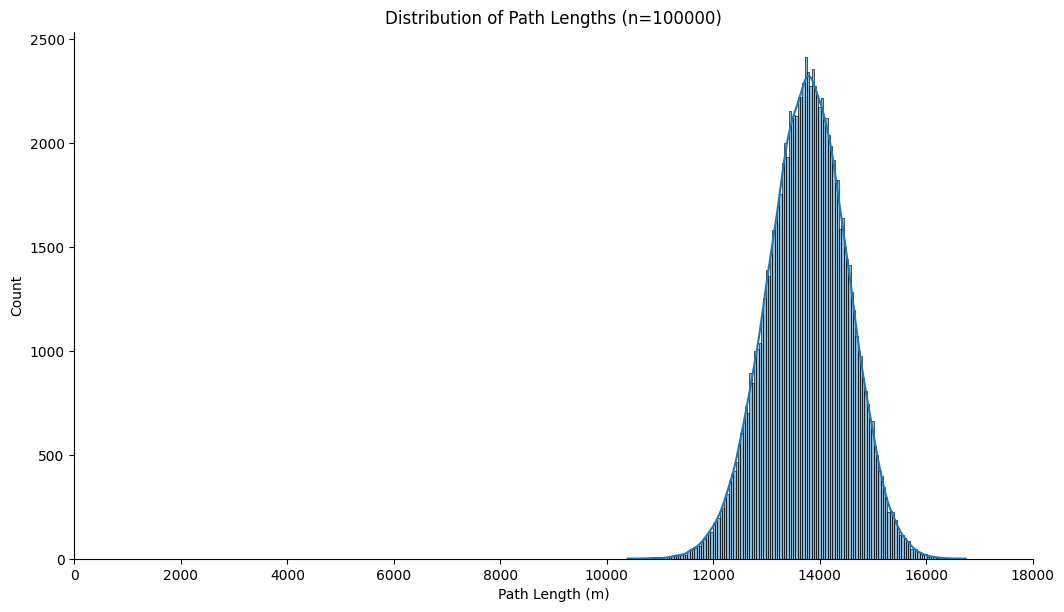

In [14]:
# plotting the distribution

sns.displot(data=df[feature_label], kde=True, height=6, aspect=16/9)
plt.xlim(0, math.ceil(max(lengths)/2000)*2000)
plt.title(f"Distribution of Path Lengths (n={len(lengths)})")
plt.show()